In [128]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns

from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [129]:
#ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

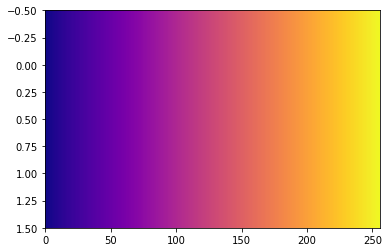

In [130]:
fig,ax=plt.subplots(nrows=1)
c=np.linspace(0,1,256)
ax.imshow( np.vstack((c, c)), aspect="auto", cmap=plt.get_cmap("plasma")) # im show takes in a 2D matrix

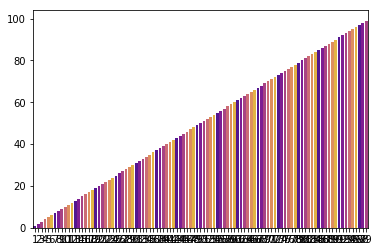

In [154]:
ax = sns.barplot(x=np.arange(1,100),
                y=np.arange(1,100),
                palette= sns.color_palette("plasma")  ) #yields weird results - cycling colors
                  #   )

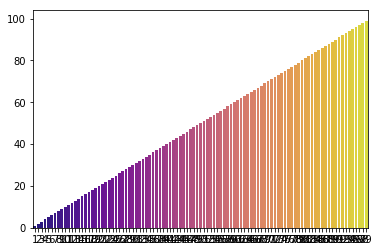

In [136]:
ax = sns.barplot(x=np.arange(1,100),
                y=np.arange(1,100),
                palette= "plasma") #only the string:   sns.color_palette("plasma") yields weird results
                  #   )

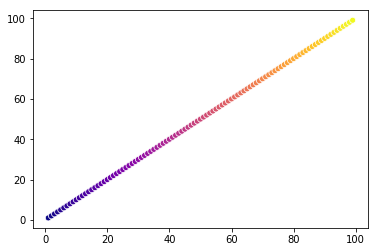

In [153]:
ax = sns.scatterplot(x=np.arange(1,100),
                y=np.arange(1,100),
                hue=np.arange(1,100) , 
                #palette={i: cm.get_cmap("plasma")(i) for i in np.arange(1,100)},       #this will not scale the colors 
                palette  ="plasma",                                                     #using only the string will automatically scale to [min,max] to use the entire spectrum
                legend=False)
#ax.get_legend().set_visible(False) #this also works

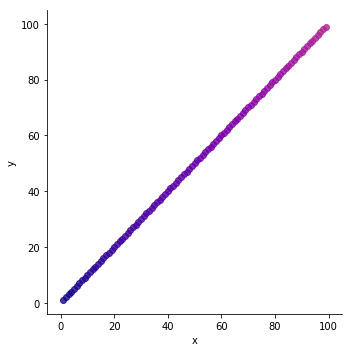

In [149]:
dfWithCol=pd.DataFrame({"x":np.arange(1,100), "y": np.arange(1,100),"col":[cm.get_cmap("plasma")(i) for i in np.arange(1,100) ]})
ax = sns.lmplot(x="x",
                y="y",
                hue="x",
                palette={i: cm.get_cmap("plasma")(i) for i in np.arange(1,100)},  #more control when sending in a dictionnary (can even assign specific colors to each point)
                #palette=dfWithCol["col"],
                data=dfWithCol,
                fit_reg=False,
                legend=False
                )

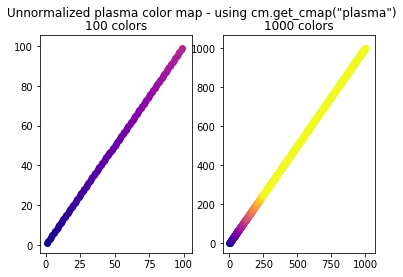

In [109]:
thisCmap=cm.get_cmap("plasma")

fig=plt.figure()
ax= fig.add_subplot(121)

numColors=100
for i in np.arange(1,numColors):
    ax.scatter(i,i, color= thisCmap(i)   )
ax.set_title("100 colors")
    
    
ax= fig.add_subplot(122)
numColors=1000
for i in np.arange(1,numColors):
    ax.scatter(i,i, color= thisCmap(i)   )
ax.set_title("1000 colors")

plt.suptitle("Unnormalized plasma color map - using cm.get_cmap(\"plasma\")")
plt.show()

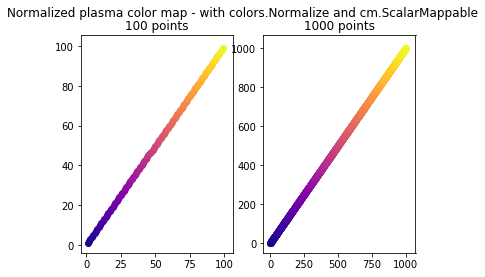

In [110]:
fig=plt.figure()
ax= fig.add_subplot(121)

numColors=100
cNorm  = colors.Normalize(vmin=0, vmax=numColors)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap.to_rgba(i)   )
ax.set_title("100 points")
    
    
ax= fig.add_subplot(122)
numColors=1000
cNorm2  = colors.Normalize(vmin=0, vmax=numColors)
scalarMap2 = cm.ScalarMappable(norm=cNorm2, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap2.to_rgba(i)   )
ax.set_title("1000 points")

fig.suptitle("Normalized plasma color map - with colors.Normalize and cm.ScalarMappable")
plt.show()

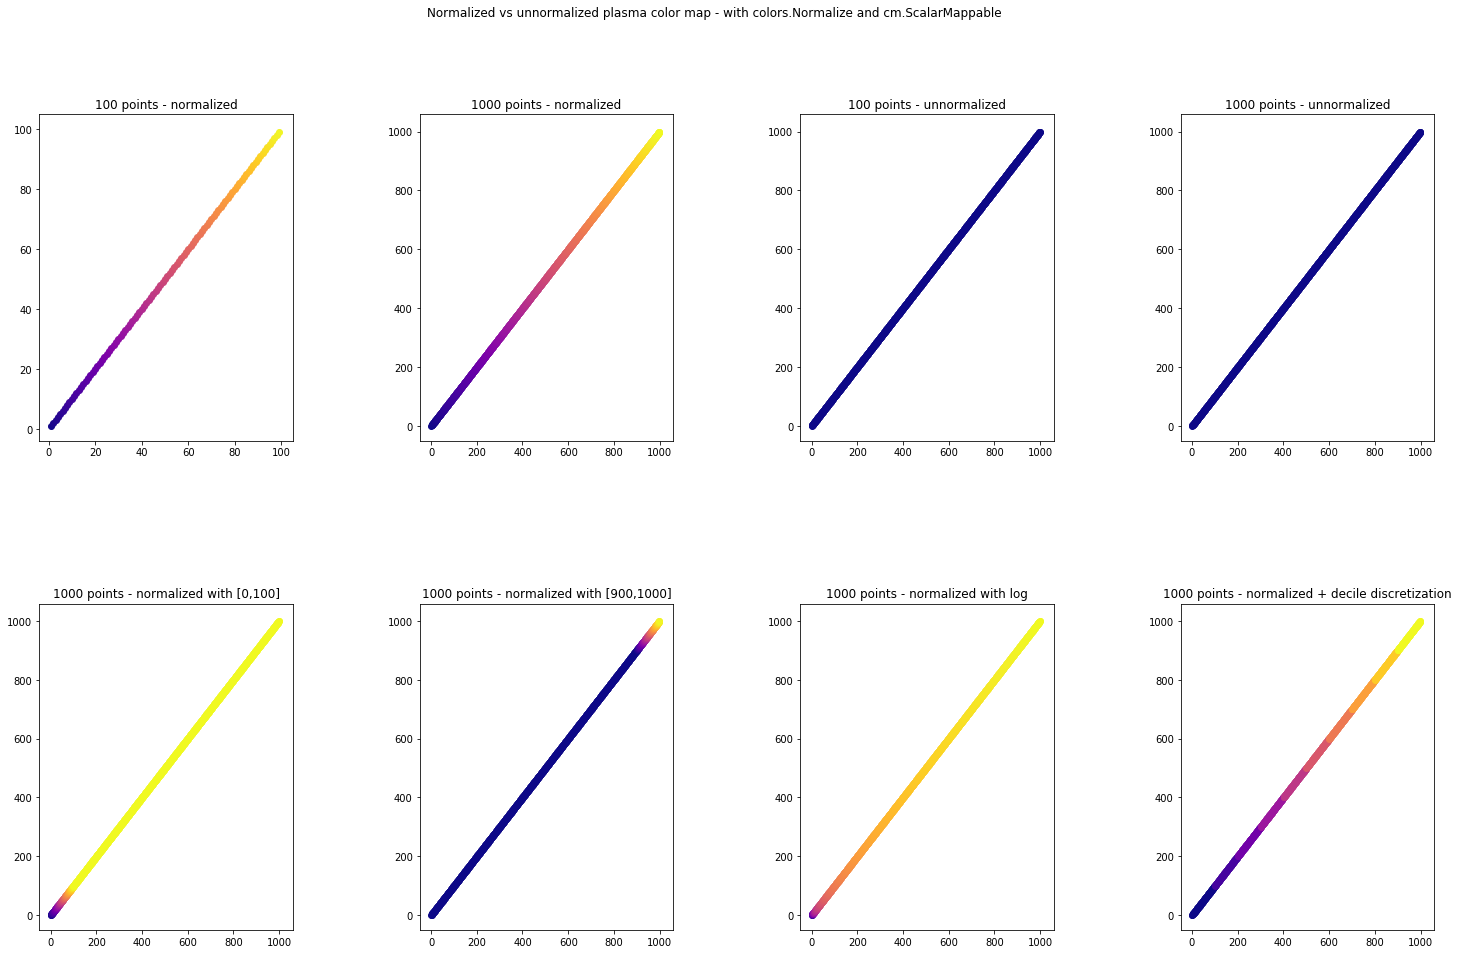

In [111]:
fig=plt.figure(figsize=(25,15)) #(width, lenth)


#1-Normalized 100 colors
ax= fig.add_subplot(241)
numColors=100
cNorm  = colors.Normalize(vmin=0, vmax=numColors)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap.to_rgba(i)   )
ax.set_title("100 points - normalized")
    

#2-Normalized 1000 colors
ax= fig.add_subplot(242)
numColors=1000
cNorm  = colors.Normalize(vmin=0, vmax=numColors)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap.to_rgba(i)   )
ax.set_title("1000 points - normalized")

    
#3-UnNormalized 100 colors    
ax= fig.add_subplot(243)
scalarMap2 = cm.ScalarMappable( cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap2.to_rgba(i)   )
ax.set_title("100 points - unnormalized")



#4-UnNormalized 1000 colors   
ax= fig.add_subplot(244)
numColors=1000
scalarMap2 = cm.ScalarMappable( cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap2.to_rgba(i)   )
ax.set_title("1000 points - unnormalized")



#5-Normalized [0,100] + 1000 colors   
ax= fig.add_subplot(245)
numColors=1000
cnorm=colors.Normalize(vmin=0,vmax=100)
scalarMap2 = cm.ScalarMappable(norm=cnorm, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap2.to_rgba(i)   )
ax.set_title("1000 points - normalized with [0,100]")




#6-Normalized [900,1000] + 1000 colors   
ax= fig.add_subplot(246)
numColors=1000
cnorm=colors.Normalize(vmin=900,vmax=1000)
scalarMap2 = cm.ScalarMappable(norm=cnorm, cmap=cm.plasma)

for i in np.arange(1,numColors):
    ax.scatter(i,i, color= scalarMap2.to_rgba(i)   )
ax.set_title("1000 points - normalized with [900,1000]")



#7-Normalized log scale + 1000 colors   
ax= fig.add_subplot(247)
numColors=1000
cnorm=colors.Normalize(vmin=log(1),vmax=log(1000))
scalarMap2 = cm.ScalarMappable(norm=cnorm, cmap=cm.plasma)

for i in (np.arange(1,numColors)):
    ax.scatter(i,i, color= scalarMap2.to_rgba(log(i))   )
ax.set_title("1000 points - normalized with log")



#8-Use quantiles to bin 
ax= fig.add_subplot(248)
quantListQCut=pd.qcut(x=np.arange(1,1000), q=10, labels=range(10))
cnorm=colors.Normalize(vmin=np.min(quantListQCut),vmax=np.max(quantListQCut))
scalarMap2 = cm.ScalarMappable(norm=cnorm, cmap=cm.plasma)

for i in (np.arange(1,1000)):
    ax.scatter(i,i, color= scalarMap2.to_rgba(quantListQCut[i-1])   )  #watch out quantListQCut is indexed 0,...,len-1
ax.set_title("1000 points - normalized + decile discretization")

plt.subplots_adjust(hspace =0.5, wspace =0.5)

fig.suptitle("Normalized vs unnormalized plasma color map - with colors.Normalize and cm.ScalarMappable")
plt.savefig(os.path.join(ROOT_DIR,"Figures","colormapTests.png"))
plt.show()

In [50]:
set([scalarMap2.to_rgba(i) for i in range(100)]) #all the same since normalization always uses just 1 value 

{(0.050383, 0.029803, 0.527975, 1.0)}

In [66]:
#Tests with log scale
from math import log, log10
log(10,10)
log10(10)

1.0

In [71]:
#Tests with quantiles/discretization
pd.cut( np.arange(1,1000), bins=10)

[(0.002, 100.8], (0.002, 100.8], (0.002, 100.8], (0.002, 100.8], (0.002, 100.8], ..., (899.2, 999.0], (899.2, 999.0], (899.2, 999.0], (899.2, 999.0], (899.2, 999.0]]
Length: 999
Categories (10, interval[float64]): [(0.002, 100.8] < (100.8, 200.6] < (200.6, 300.4] < (300.4, 400.2] ... (599.8, 699.6] < (699.6, 799.4] < (799.4, 899.2] < (899.2, 999.0]]

In [83]:
inter, binLeftVal =pd.cut( np.arange(1,1000), bins=10,retbins=True,right=True) #right only change the interval shape (] by default and [) if right == False )
inter

[(0.002, 100.8], (0.002, 100.8], (0.002, 100.8], (0.002, 100.8], (0.002, 100.8], ..., (899.2, 999.0], (899.2, 999.0], (899.2, 999.0], (899.2, 999.0], (899.2, 999.0]]
Length: 999
Categories (10, interval[float64]): [(0.002, 100.8] < (100.8, 200.6] < (200.6, 300.4] < (300.4, 400.2] ... (599.8, 699.6] < (699.6, 799.4] < (799.4, 899.2] < (899.2, 999.0]]

In [90]:
quantListQCut=pd.qcut(x=np.arange(1,1000), q=10, labels=range(10))

In [89]:
#Compare manual bisection to determine in which quantile/bucket a point falls
import bisect
quantList=[ bisect.bisect_left(binVal, i)-1 for i in np.arange(1,1000)] 

In [91]:
print(len(quantList) ,len(quantListQCut) )

999 999


In [92]:
#Ok both approches are the same 
np.array([quantList[i] == quantListQCut[i] for i in range(len(quantListQCut))]).all()

True

In [100]:
#Check that the min and max values map to the 1st and last quantiles
print(quantListQCut[0], quantListQCut[998//2], quantListQCut[998])   #watch out, make sure we return an integer

0 4 9
